In [1]:
from sklearn.datasets import make_regression
reg_data, reg_target = make_regression(n_samples=100, n_features=2,
effective_rank=1, noise=10)
  

In [3]:
import numpy as np
from sklearn.linear_model import RidgeCV
rcv = RidgeCV(alphas=np.array([.1, .2, .3, .4]))
rcv.fit(reg_data, reg_target)

RidgeCV(alphas=array([0.1, 0.2, 0.3, 0.4]))

In [4]:
rcv.alpha_

0.1

In [5]:
rcv2 = RidgeCV(alphas=np.array([.08, .09, .1, .11, .12]))
rcv2.fit(reg_data, reg_target)

RidgeCV(alphas=array([0.08, 0.09, 0.1 , 0.11, 0.12]))

In [6]:
rcv2.alpha_

0.08

In [7]:
alphas_to_test = np.linspace(0.01, 1)
rcv3 = RidgeCV(alphas=alphas_to_test, store_cv_values=True)
rcv3.fit(reg_data, reg_target)

RidgeCV(alphas=array([0.01      , 0.03020408, 0.05040816, 0.07061224, 0.09081633,
       0.11102041, 0.13122449, 0.15142857, 0.17163265, 0.19183673,
       0.21204082, 0.2322449 , 0.25244898, 0.27265306, 0.29285714,
       0.31306122, 0.33326531, 0.35346939, 0.37367347, 0.39387755,
       0.41408163, 0.43428571, 0.4544898 , 0.47469388, 0.49489796,
       0.51510204, 0.53530612, 0.5555102 , 0.57571429, 0.59591837,
       0.61612245, 0.63632653, 0.65653061, 0.67673469, 0.69693878,
       0.71714286, 0.73734694, 0.75755102, 0.7777551 , 0.79795918,
       0.81816327, 0.83836735, 0.85857143, 0.87877551, 0.89897959,
       0.91918367, 0.93938776, 0.95959184, 0.97979592, 1.        ]),
        store_cv_values=True)

In [8]:
rcv3.cv_values_.shape

(100, 50)

In [9]:
smallest_idx = rcv3.cv_values_.mean(axis=0).argmin()
alphas_to_test[smallest_idx]


0.030204081632653063

In [10]:
rcv3.alpha_

0.030204081632653063

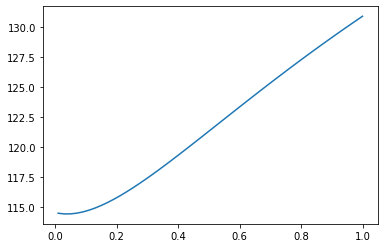

In [12]:
import matplotlib.pyplot as plt
plt.plot(alphas_to_test, rcv3.cv_values_.mean(axis=0))

In [13]:
from sklearn.metrics import mean_absolute_error

In [14]:
from sklearn.metrics import make_scorer
MAD_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

In [15]:
rcv4 = RidgeCV(alphas=alphas_to_test, store_cv_values=True,
scoring=MAD_scorer)
rcv4.fit(reg_data, reg_target)
smallest_idx = rcv4.cv_values_.mean(axis=0).argmin()


In [16]:
rcv4.cv_values_.mean(axis=0)[smallest_idx]

-0.031411019363774634

In [17]:
alphas_to_test[smallest_idx]

0.01

In [19]:
#the following script requires scikit-learn 0.19.0 or higher version
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.0.1.


In [21]:
X = np.linspace(0, 5)
y_truth = 3 * X
y_noise = np.random.normal(0, 0.5, len(y_truth)) #normally distributed noise with mean 0 and spread 0.1
y_noisy = (y_truth + y_noise)

In [22]:
from sklearn.linear_model import BayesianRidge
br_inst = BayesianRidge().fit(X.reshape(-1, 1), y_noisy)

<ErrorbarContainer object of 3 artists>

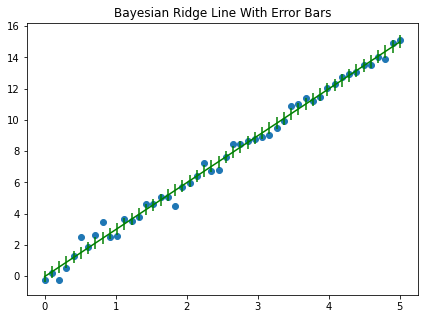

In [25]:
y_pred, y_err = br_inst.predict(X.reshape(-1, 1), return_std=True)
plt.figure(figsize=(7, 5))
plt.scatter(X, y_noisy)
plt.title("Bayesian Ridge Line With Error Bars")
plt.errorbar(X, y_pred, y_err, color='green')
